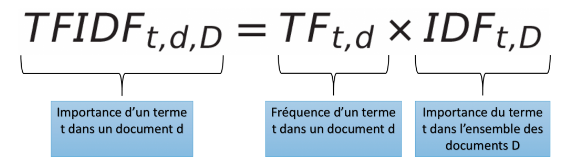

In [3]:
import os
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd

from pyspark.ml.feature import HashingTF, IDF, Tokenizer
import pickle  

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## define a set of path: 
PATH = os.path.dirname(os.getcwd()) 
dataset_path = os.path.join(PATH, "dataset")
models_path = os.path.join(PATH, "models")

In [4]:
def load_data():
    load_data():
    """To load data we've reated before
    """
    data_path = os.path.join(dataset_path, "all_data.xlsx")
    data = pd.read_excel(data_path) 
    data_labels = data["labels"]  #Taking lables in separate
    print("data loaded")
    return data, data_labels

def tfidf(data):
    """Term frequency-inverse document frequency  for features extraction and transformation 
    :param data the dataset to use for word embeding .
    :type pandas dataframe
    :return tfidf model and features.
    :type spark.dataframe
    """
    # corpus = pd.DataFrame({"reviews": train_data["reviews"], "lables": train_data["lables"]})
    # corpus.reviews.append(test_data["reviews"], ignore_index=True)
    corpus = data.copy()
    dataset = spark.createDataFrame(corpus, list(corpus.columns))

    tokenizer = Tokenizer(inputCol="reviews", outputCol="words")
    wordsData = tokenizer.transform(dataset)

    hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=20)
    featurizedData = hashingTF.transform(wordsData)

    idf = IDF(inputCol="rawFeatures", outputCol="features")
    idfModel = idf.fit(featurizedData)
    rescaledData = idfModel.transform(featurizedData)
    features = rescaledData.select("features","labels")
    #save model 
    tfidf = os.path.join(models_path, "tfidf.pickle")
    pickle.dump(tfidf, open(tfidf, "wb"))
    print("tfidf model saved")
    return idfModel, features

def plot_score(model, x,y, x_label='params', y_label='score'):*
    """used for visualization of data
    :param model is the model name. 
    :type string
    :param x, y : the x and y axes values  to be visualized.
    :type list 
    :param x_label is the x label name, by defaut=params.
    :type string
    :param y_label is the y label name, by defaut=score.
    :type string
    """
    plt.figure(figsize=(9, 9))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x, y)
    title = 'result of learning using  {}'.format(model)
    plt.suptitle(title)
    plt.show()

#### loading data

In [5]:
data, data_labels = load_data()

data loaded


#### TF IDF method

In [6]:
idfModel, features= tfidf(data)
features.show() 

tfidf model saved
+--------------------+------+
|            features|labels|
+--------------------+------+
|(20,[0,1,2,3,4,5,...|     1|
|(20,[0,1,2,3,4,5,...|     1|
|(20,[0,1,2,3,4,5,...|     1|
|(20,[0,1,2,3,4,5,...|     1|
|(20,[0,1,2,3,4,5,...|     1|
|(20,[0,1,2,3,4,5,...|     1|
|(20,[0,1,2,3,4,5,...|     1|
|(20,[0,2,3,4,5,6,...|     1|
|(20,[0,1,2,3,4,5,...|     1|
|(20,[0,2,3,4,5,6,...|     1|
|(20,[0,2,3,4,5,6,...|     1|
|(20,[0,1,2,3,4,5,...|     1|
|(20,[0,1,2,3,4,5,...|     1|
|(20,[0,1,2,3,4,5,...|     1|
|(20,[0,1,2,3,4,5,...|     1|
|(20,[0,1,2,3,4,6,...|     1|
|(20,[0,3,4,6,7,8,...|     1|
|(20,[0,1,2,3,4,5,...|     1|
|(20,[0,1,2,3,4,5,...|     1|
|(20,[0,1,2,3,4,5,...|     1|
+--------------------+------+
only showing top 20 rows



+------+-----+
|labels|count|
+------+-----+
|     0|12500|
|     1|12499|
+------+-----+



Text(0.5, 0, 'sentiment vs nbr of reviews postive/negative')

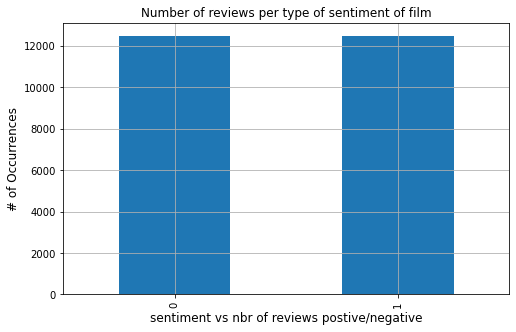

In [13]:
#@title  diplay statistic about Labels/class   (positive/negative)
gr = features.groupBy("labels").count()
gr.show()

statisic_df = gr.select("*").toPandas()
statisic_df.plot(x='labels', y='count', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of reviews per type of sentiment of film")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('sentiment vs nbr of reviews postive/negative', fontsize=12)

# Save TF_IDF features

In [16]:
tfidf_features_df_path = os.path.join(dataset_path, "tfidf_features.xlsx")
tfidf_features_df = features.select("*").toPandas()
#tfidf_features_df.to_excel(tfidf_features_df_path) 
tfidf_features_df.to_csv(tfidf_features_df_path, index=False, header=False)
tfidf_features_df

,features,labels
0,"(0.12117709053440283, 0.08603730609620996, 0.0...",1
1,"(0.3332369989696078, 1.5486715097317794, 0.493...",1
2,"(0.21205990843520495, 0.34414922438483986, 0.2...",1
3,"(0.060588545267201414, 0.08603730609620996, 0....",1
4,"(0.12117709053440283, 0.5162238365772598, 0.18...",1
...,...,...
24994,"(0.09088281790080212, 0.08603730609620996, 0.3...",0
24995,"(0.09088281790080212, 0.2581119182886299, 0.24...",0
24996,"(0.45441408950401063, 0.9464103670583096, 0.18...",0
24997,"(0.18176563580160424, 1.2045222853469395, 0.37...",0


In [17]:
#tfidf_features_df_path = os.path.join(dataset_path, "tfidf_features.xlsx")
#tfidfFeatures_df = spark.read.csv(tfidf_features_df_path, inferSchema=True).toDF("features","labels")
#parse = udf(lambda s: Vectors.parse(s), VectorUDT())
#a = tfidfFeatures_df.select(parse("features"),"labels")
#a = a.withColumnRenamed("<lambda>(features)","features")
#a.show() , a
#tfidfFeatures_df